# Project 1

## Part A

### 0) We ask you to create a folder for you project, in which you will be working on the project. You will be asked to send us this project that we can look at your progress and browse through your work. Please follow the instructions in the seminar or a documentation of julia about the activation of an environment and use it for your project. (It can be found also here: https://pkgdocs.julialang.org/v1/environments/ even it is from prompt/terminal, in a notebook use `Pkg.activate(".")`) 
* In your project, you will be adding packages, using them, you can create a script files as well and load them (with helper functions if needed.)

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/fin_econometrics_2/project1`


In [2]:
Pkg.instantiate()
Pkg.status()

Status `~/Documents/fin_econometrics_2/project1/Project.toml`
  [6d3278bc] ARCHModels v2.3.4
  [fbb218c0] BSON v0.3.7
  [ad839575] Blink v0.12.8
  [336ed68f] CSV v0.10.11
  [a93c6f00] DataFrames v1.6.1
⌃ [1313f7d8] DataFramesMeta v0.14.0
⌃ [31c24e10] Distributions v0.25.102
  [587475ba] Flux v0.14.6
⌃ [38e38edf] GLM v1.8.3
  [c601a237] Interact v0.10.5
  [945b72a4] MarketData v0.13.12
  [429524aa] Optim v1.7.8
  [91a5bcdd] Plots v1.39.0
  [ce6b1742] RDatasets v0.7.7
  [b0e4dd01] RollingFunctions v0.8.0
⌅ [2913bbd2] StatsBase v0.33.21
  [f3b207a7] StatsPlots v0.15.6
  [bd369af6] Tables v1.11.1
  [9e3dc215] TimeSeries v0.23.2
  [e88e6eb3] Zygote v0.6.67
  [37e2e46d] LinearAlgebra
  [10745b16] Statistics v1.9.0
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [330]:
include("project_functions.jl")

trainW4 (generic function with 1 method)

### 1) Use package `MarketData`, `Quandl`, or different one, if needed go to their github pages and `docs`, then **download data for an asset** of your choice.

In [4]:
using MarketData, Dates

We will load daily data of the Pfizer stock as it ought to be interesting to study volatility of a company which presumably was influenced greatly by the COVID19 virus.

In [5]:
PFE = yahoo("PFE", YahooOpt(period1 = DateTime(2010, 1, 1), period2 = now()))

3494×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 2010-01-04 to 2023-11-17
│            │ Open    │ High    │ Low     │ Close   │ AdjClose │ Volume      │
├────────────┼─────────┼─────────┼─────────┼─────────┼──────────┼─────────────┤
│ 2010-01-04 │ 17.334  │ 17.9696 │ 17.3055 │ 17.9602 │ 10.6451  │ 5.4898644e7 │
│ 2010-01-05 │ 17.9507 │ 17.9602 │ 17.5996 │ 17.704  │ 10.4932  │ 4.5714931e7 │
│ 2010-01-06 │ 17.704  │ 17.8463 │ 17.5617 │ 17.6471 │ 10.4595  │ 4.3640975e7 │
│ 2010-01-07 │ 17.685  │ 17.7135 │ 17.5142 │ 17.5806 │ 10.4201  │ 4.1557112e7 │
│ 2010-01-08 │ 17.666  │ 17.7514 │ 17.5712 │ 17.723  │ 10.5045  │ 3.2049716e7 │
│ 2010-01-11 │ 17.8653 │ 17.9791 │ 17.7135 │ 17.8653 │ 10.5888  │ 3.4199665e7 │
│ 2010-01-12 │ 17.8368 │ 18.0171 │ 17.685  │ 17.8084 │ 10.5551  │ 4.3501847e7 │
│ 2010-01-13 │ 17.9032 │ 18.3112 │ 17.9032 │ 18.2258 │ 10.8025  │ 6.2728072e7 │
│ ⋮          │ ⋮       │ ⋮       │ ⋮       │ ⋮       │ ⋮        │ ⋮           │
│ 2023-11-09 │ 30.49   │ 30.51   │ 29.63   

### 2) Use plot to look at the data, do some summary statistics, `Statistics`, `DataFrames`, `StatsPlots` packages


In [21]:
using Statistics, DataFrames, StatsPlots, TimeSeries, KernelDensity, RollingFunctions, DataFramesMeta

PLease note in the underneath transformations that both realized variance and realized volatility is considered. Namely, literature illustrates the usage of both with regards to HAR estimation as well as HAR forecasting.

Where Realized Variance can be denoted as:

$$ RV = \sum_{i=1}^n(r_i)^2  $$

And Realized Volatility as:

$$ RV = \sqrt{\sum_{i=1}^n(r_i)^2} $$

$r_i$ is the log return at time $i$, and $n$ is the number of observations.

In [22]:
df = DataFrame(PFE)
df = @transform(df, :ln_returns = [NaN; diff(log.(:AdjClose))]) #logarithmic returns of the closing price
df = @transform(df, :r_var = running(sum,:ln_returns .^2, 20)) #rolling sum of squared returns over a window of 20 observations
df = @transform(df, :r_vol = sqrt.(:r_var)) #Realized Volatility, square root of rolling variance
df = df[31:end,:]
first(df, 5)

5×10 DataFrame
 Row │ timestamp   Open     High     Low      Close    AdjClose  Volume     ln ⋯
     │ Date        Float64  Float64  Float64  Float64  Float64   Float64    Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2010-02-17  16.9355  16.945   16.6319  16.7647   10.0303  6.13998e7  -0 ⋯
   2 │ 2010-02-18  16.7742  16.8406  16.6509  16.8216   10.0644  6.02029e7   0
   3 │ 2010-02-19  16.907   17.1727  16.8216  17.0683   10.212   5.33933e7   0
   4 │ 2010-02-22  17.0588  17.2201  16.8691  17.0304   10.1893  6.1134e7   -0
   5 │ 2010-02-23  16.926   17.0209  16.7078  16.7647   10.0303  5.04584e7  -0 ⋯
                                                               3 columns omitted

In [23]:
stats = describe(df, :detailed)
println(stats)

10×11 DataFrame
 Row │ variable    mean        std        min          q25          median      q75         max         nunique  nmissing  eltype   
     │ Symbol      Union…      Union…     Any          Union…       Any         Union…      Any         Union…   Int64     DataType 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ timestamp                          2010-02-17                2017-01-01              2023-11-17  3464            0  Date
   2 │ Open        32.0736     9.24846    13.4915      27.2747      32.2581     36.9751     60.6                        0  Float64
   3 │ High        32.3633     9.37173    13.5958      27.4739      32.4953     37.2445     61.71                       0  Float64
   4 │ Low         31.7837     9.12441    13.2827      27.1063      32.0256     36.6        59.83                       0  Float64
   5 │ Close       32.0754     9.25234    13.4156      27.2581  

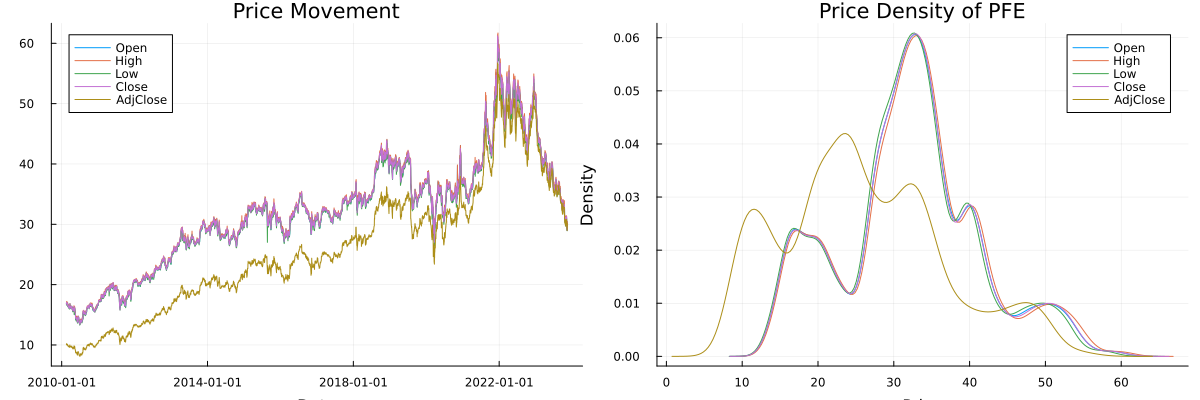

In [24]:
pl1 = plot(df.timestamp,df.Open, label="Open")
pl1 = plot!(df.timestamp,df.High, label="High")
pl1 = plot!(df.timestamp,df.Low, label="Low")
pl1 = plot!(df.timestamp,df.Close, label="Close")
pl1 = plot!(df.timestamp,df.AdjClose, label="AdjClose")
pl1 = plot!(legend=:topleft, xlabel="Date", ylabel="Price", title = "Price Movement")
pl2 = density(df.Open, label="Open")
pl2 = density!(df.High, label="High")
pl2 = density!(df.Low, label="Low")
pl2 = density!(df.Close, label="Close")
pl2 = density!(df.AdjClose, label="AdjClose")
pl2 = plot!(legend=:topright, xlabel="Price", ylabel="Density", title = "Price Density of PFE")
plot(pl1, pl2, size=(1200,400))

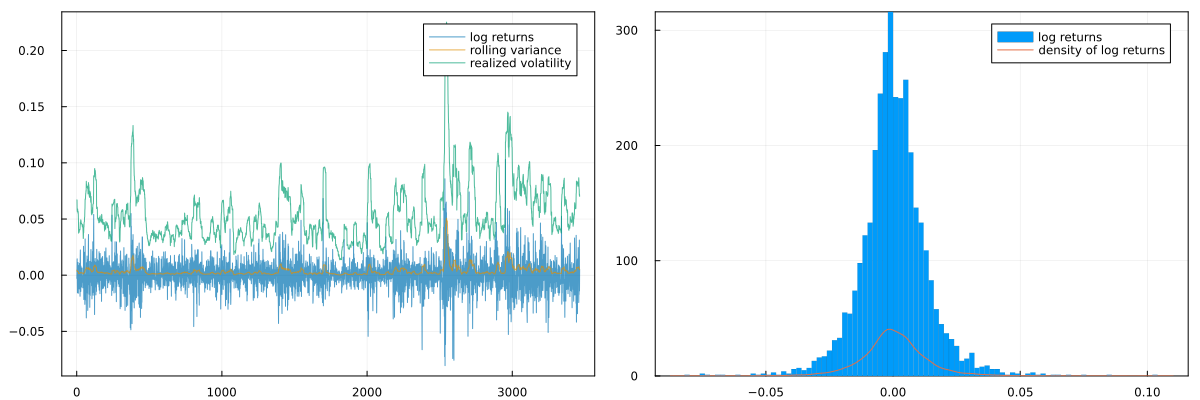

In [25]:
p1 = plot(df.ln_returns, line=(1., 0.7, :solid), label="log returns", palette=:seaborn_colorblind, size=(1000,400))
p1 = plot!(df.r_var, line=(1., 0.7, :solid), label="rolling variance", framestyle=:box)
p1 = plot!(df.r_vol, line=(1., 0.7, :solid), label="realized volatility", framestyle=:box)
p2 = histogram(df.ln_returns, l=0, framestyle=:box, label = "log returns")
p2 = density!(df.ln_returns, label="density of log returns")

plot(p1, p2, size=(1200,400))

In [26]:
size(df.r_vol)

(3464,)

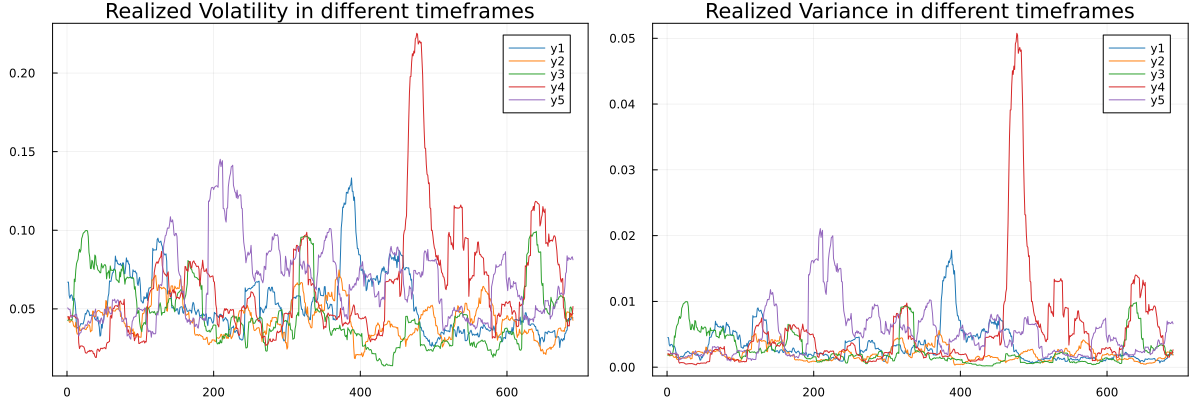

In [27]:
# empty array
subsample_r_vol = []
# loop
for t in 1:690:3450
    push!(subsample_r_vol, df.r_vol[t:t+690-1]) # this pushes = adds plot p0 into the array to store it
end
pl3 = plot(subsample_r_vol, size=(1000,500), framestyle=:box, palette=:tab10, title = "Realized Volatility in different timeframes")
# empty array
subsample_r_var = []
# loop
for t in 1:690:3450
    push!(subsample_r_var, df.r_var[t:t+690-1]) # this pushes = adds plot p0 into the array to store it
end
pl4 = plot(subsample_r_var, size=(1000,500), framestyle=:box, palette=:tab10, title = "Realized Variance in different timeframes")
plot(pl3, pl4, size=(1200,400))

### 3) Use `ARCHModels.jl` to **model** asset data and **forecast**.

#### GARCH

Univariate GARCH (p, q) model:

$\sigma_t^2 = \omega + \sum_{i=1}^p \alpha_i \epsilon_{t-1}^2 + \sum_{i=1}^q \beta_i \sigma_{t-i}^2$

In [28]:
using ARCHModels

Let us select the GARCH model based on the AIC criteria:

In [29]:
candidate_p = [1,2,3]
candidate_q = [1,2,3]

best_aic = Inf
garch_fit = nothing

for p in candidate_p
    for q in candidate_q
        model = fit(GARCH{p, q}, df.ln_returns)
        aic = StatsBase.aic(model) 
                
        if aic < best_aic
            best_aic = aic
            garch_fit = model
        end
    end
end

garch_fit


GARCH{1, 1} model with Gaussian errors, T=3464.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000558832  0.000192335  2.90551    0.0037
──────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
      Estimate   Std.Error   z value  Pr(>|z|)
──────────────────────────────────────────────
ω   6.37835e-6  2.27762e-6   2.80045    0.0051
β₁  0.849219    0.0334686   25.3736     <1e-99
α₁  0.119501    0.0265423    4.50227    <1e-05
──────────────────────────────────────────────


In our case, the GARCH(1,1) seems to be the best based on the information criteria. Hence, I will predict the conditional variances for the next three time steps based on the GARCH(1,1).

In [30]:
forecasted_variances = predict.(garch_fit, :return, 1:3)

3-element Vector{Float64}:
 0.0005588323562273052
 0.0005588323562273052
 0.0005588323562273052

Differently, we can compare how well the predictions perform performing backtesting methods:

In [300]:
T = length(df.ln_returns);
windowsize = 1000;
vol = similar(df.ln_returns);
for t = windowsize+1:T-1
    m = fit(GARCH{1, 1}, df.ln_returns[t-windowsize:t]);
    vol[t+1] = predict(m, :volatility; level=0.05);
end

### 4) **Plot** forecasts.


In [299]:
plot(df.timestamp[1005:T], df.r_vol[1005:end]/3.5, label="Observed Volatility", ylabel="Volatility", xlabel="Time")
plot!(df.timestamp[1005:T], vol[1005:end], label="Forecasted Volatility", linestyle=:dash, title="GARCH Model, MSE: $(mean(abs2, df.r_vol[1005:end]/3.5 - vol[1005:end]))", size = (1000, 400))

Note, the model is trained or estimated on the first 1000 observations and then predicted for the remainder of the observed values. In our case, only observations 1005:length(df.ln_returns) is illustrated in the graph. In addition, there is a shift with our calculated realized volatility (r_vol), potentially due to difference in calculation but if we divide our r_vol by 3.5 to align the prediction with our observations we see a seemingly accurate prediction.

## Part B

- *OLS* vs *ML* estimation HAR
    - Estimate coefficients with different approaches
    - Optim.jl vs Flux.jl
    - Discuss coefficients, show them in scatter, histograms
    - test different activations in NN
    - play around with regularizations
    - Make Q-Q plots, a table of performance

#### HAR

Let us first consider the HAR model:
$$ RV_t = \beta_0 + \beta_1  RV_{d,t} + \beta_2  RV_{w,t} + \beta_3  RV_{m,t} + \epsilon_t $$
where $RV_t$ can be denoted as:
realized variance, $RV_t = \sigma_t^2 $ or
realized volatility, $ RV_t = \sqrt{\sigma_t^2} $

Hence, we will first calculate daily, weekly and monthly Realized Volatilities:

In [36]:
HAR_regressors(df.r_vol)

3442×3 Matrix{Float64}:
 0.0403491  0.0403108  0.049439
 0.0420423  0.0408109  0.0483048
 0.0442856  0.0415242  0.0472718
 0.0471132  0.042853   0.0467529
 0.0466179  0.0440816  0.0462944
 0.0478077  0.0455733  0.0458058
 0.0493166  0.0470282  0.0453671
 0.0486817  0.0479074  0.0449344
 0.0479503  0.0480748  0.044598
 0.0456389  0.047879   0.0441054
 ⋮                     
 0.0822953  0.0808596  0.0750682
 0.0823209  0.081079   0.0760744
 0.0834591  0.0819068  0.077162
 0.0867335  0.0834182  0.0784128
 0.0833533  0.0836324  0.0795102
 0.0773366  0.0826407  0.080323
 0.0763233  0.0814411  0.0808641
 0.0711265  0.0789746  0.0808043
 0.0721515  0.0760582  0.0807471

We can now identify the predictors and target for our study.

In [45]:
predictors = HAR_regressors(df.r_vol)
target = df.r_vol[23:end]
size(predictors), size(target)

((3442, 3), (3442,))

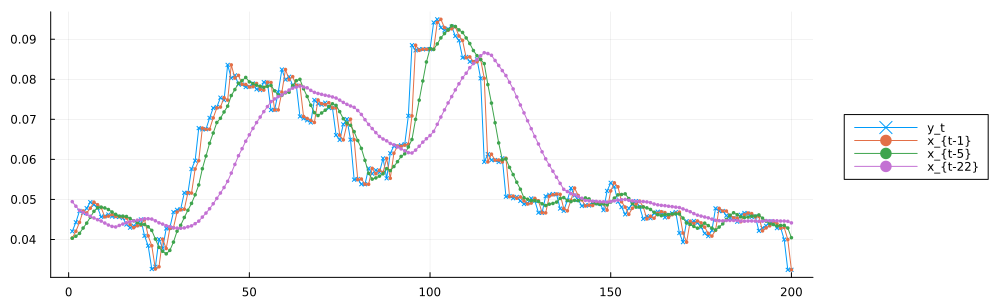

In [66]:
plt_data = plot(target[1:200]; label="y_t",  m=(2,:x), msw=0, size=(1000,300), legend=:outerright)
plt_data = plot!(predictors[1:200,1]; label="x_{t-1}", m=(2), msw=0)
plt_data = plot!(predictors[1:200,2]; label="x_{t-5}", m=(2), msw=0)
plt_data = plot!(predictors[1:200,3]; label="x_{t-22}", m=(2), msw=0)

##### OLS Estimator

$X′X\beta=X′y$

In [46]:
using GLM

In [47]:
data_har = DataFrame([target predictors], [:rv_t, :rv_d, :rv_w, :rv_m]);
first(data_har,5)

5×4 DataFrame
 Row │ rv_t       rv_d       rv_w       rv_m      
     │ Float64    Float64    Float64    Float64   
─────┼────────────────────────────────────────────
   1 │ 0.0420423  0.0403491  0.0403108  0.049439
   2 │ 0.0442856  0.0420423  0.0408109  0.0483048
   3 │ 0.0471132  0.0442856  0.0415242  0.0472718
   4 │ 0.0466179  0.0471132  0.042853   0.0467529
   5 │ 0.0478077  0.0466179  0.0440816  0.0462944

In [48]:
har = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), data_har)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

rv_t ~ 1 + rv_d + rv_w + rv_m

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.00131631  0.000174849   7.53    <1e-13   0.000973487   0.00165913
rv_d          1.10025     0.0151406    72.67    <1e-99   1.07057       1.12994
rv_w         -0.0882582   0.0183606    -4.81    <1e-05  -0.124257     -0.0522595
rv_m         -0.0359374   0.00671974   -5.35    <1e-07  -0.0491125    -0.0227623
─────────────────────────────────────────────────────────────────────────────────

In [49]:
har_prediction = GLM.predict(har, ); # fit
first(har_prediction,5)

5-element Vector{Float64}:
 0.04037600307522537
 0.04223562825814996
 0.04467801046947322
 0.04769036195477426
 0.047053487622108564

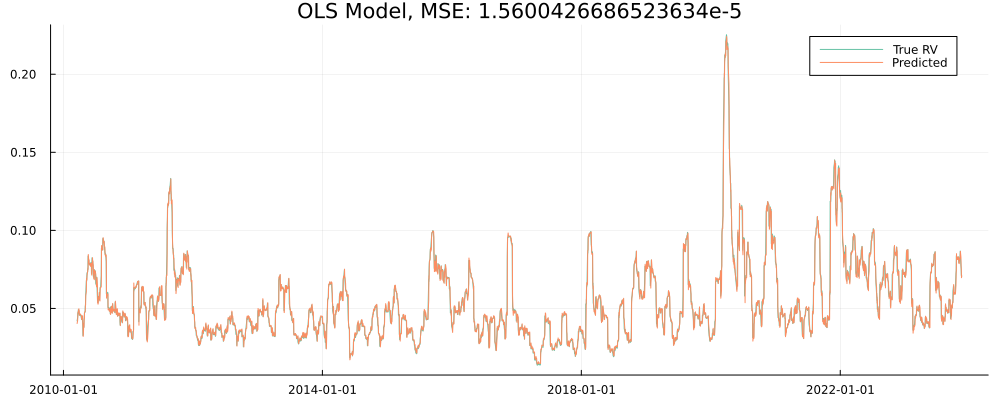

In [298]:
p1 = plot(df[23:end,:timestamp], data_har.rv_t, lab="True RV", leg=:topright, 
    title="OLS Model, MSE: $(mean(abs2, data_har.rv_t - har_prediction))", palette=:Set2_3)
p1 = plot!(df[23:end,:timestamp], har_prediction, lab="Predicted", size = (1000, 400))

However, the above seems to be too good to be true as they are basically overlapping. Therefore, let's do some backtesting again to see it's ability to forecast.

In [295]:
T = length(data_har.rv_t);
windowsize = 1000;
ols_vol = similar(data_har.rv_t);
for t = windowsize+1:T-1
    window_data = data_har[t-windowsize:t, :]
    har = lm(@formula(rv_t ~ rv_d + rv_w + rv_m), window_data)
    ols_vol[t+1] = GLM.predict(har)[1]
end

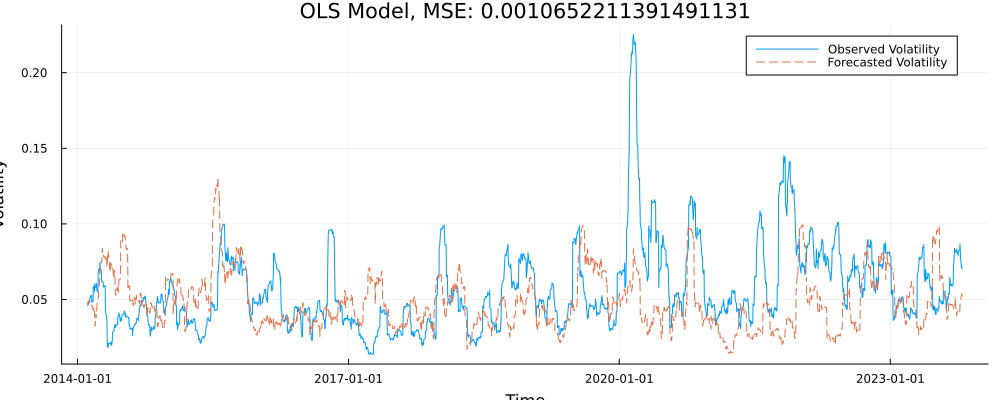

In [297]:
plot(df.timestamp[1005:T], data_har.rv_t[1005:end], label="Observed Volatility", ylabel="Volatility", xlabel="Time")
plot!(df.timestamp[1005:T], ols_vol[1005:end], label="Forecasted Volatility", linestyle=:dash, title="OLS Model, MSE: $(mean(abs2, data_har.rv_t[1005:end] - ols_vol[1005:end]))", size = (1000, 400))

Here, we can clearly see a less accurate prediction of the previously implemented GARCH model. Nevertheless, still a pretty good prediction accuracy as we can also reject the $H_0$ meaning that the forecast accuracy of the two models being compared is significantly different.

### Optim

In [67]:
using Optim
using Distributions

In [69]:
# Optimize
result = optimize(params -> har_model(params, data_har), [0.1, 0.1, 0.1, 0.1], LBFGS())

# Extract the estimated parameters
estimated_params = result.minimizer

4-element Vector{Float64}:
  0.0013163058287152583
  1.100252451196926
 -0.08825823355754882
 -0.035937373800366844

In [301]:
T = length(data_har.rv_t);
windowsize = 1000;
optim_vol = similar(data_har.rv_t);
for t = windowsize+1:T-1
    window_data = data_har[t-windowsize:t, :]
    optim = optimize(params -> har_model(params, window_data), [0.1, 0.1, 0.1, 0.1], LBFGS())
    features = select(window_data, [:rv_d, :rv_w, :rv_m])
    optim_vol[t+1] = predict_har(estimated_params, features)[1]
end

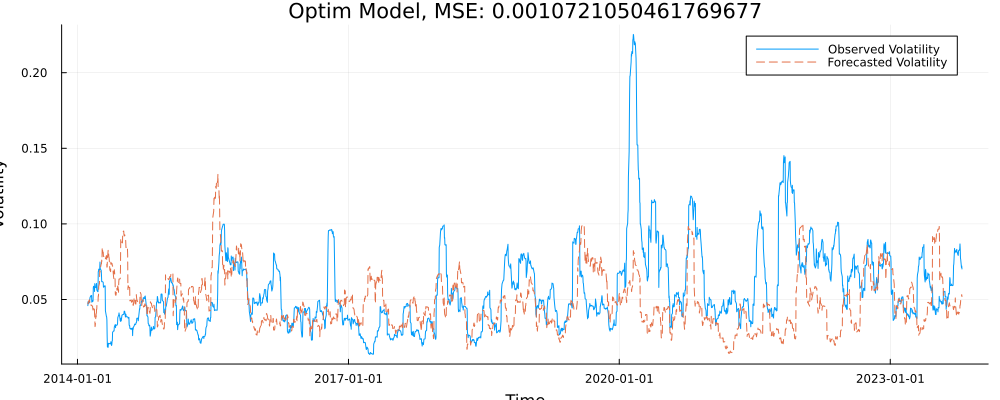

In [302]:
plot(df.timestamp[1005:T], data_har.rv_t[1005:end], label="Observed Volatility", ylabel="Volatility", xlabel="Time")
plot!(df.timestamp[1005:T], optim_vol[1005:end], label="Forecasted Volatility", linestyle=:dash, title="Optim Model, MSE: $(mean(abs2, data_har.rv_t[1005:end] - optim_vol[1005:end]))", size = (1000, 400))

-------

### Flux

In [75]:
using Flux

In [82]:
size(predictors)

(3442, 3)

In [83]:
xtrain = predictors[1:2750,:] |> permutedims .|> Float32
ytrain = target[1:2750] |> permutedims .|> Float32
xvalid = predictors[2751:3442,:] |> permutedims .|> Float32
yvalid = target[2751:3442] |> permutedims .|> Float32;

Note for self, the above transposes the matrices and converts the elements to 32-bit floating-point numbers.  

## FFNN

In [342]:
include("project_functions.jl")

trainW4 (generic function with 1 method)

In [156]:
using StatsBase

standardization of data:

In [169]:
fit_xt = StatsBase.fit(ZScoreTransform, log.(xtrain); dims=2, center=true, scale=true)
fit_xv = StatsBase.fit(ZScoreTransform, log.(xvalid); dims=2, center=true, scale=true)
fit_yt = StatsBase.fit(ZScoreTransform, log.(ytrain); dims=2, center=true, scale=true)
fit_yv = StatsBase.fit(ZScoreTransform, log.(yvalid); dims=2, center=true, scale=true)

ZScoreTransform{Float32, Vector{Float32}}(1, 2, Float32[-2.7632768], Float32[0.3454383])

ZScoreTransform is a standardization method used to transform data into a standard normal distribution with a mean of 0 and a standard deviation of 1.

In [170]:
xt_std = StatsBase.transform(fit_xt, log.(xtrain))
xv_std = StatsBase.transform(fit_xv, log.(xvalid))
yt_std = StatsBase.transform(fit_yt, log.(ytrain))
yv_std = StatsBase.transform(fit_yv, log.(yvalid))

1×692 Matrix{Float32}:
 -0.873075  -1.07665  -1.06012  -1.90016  …  0.347331  0.388752  0.308799

Now we implement the ffnn model specified in our project_functions.jl file. Note that this is the trainW3() function from the seminar with a few tweeks and changes:
- Usage of batch normalization, 

In [363]:
FFNN, losses11, losses12 = ffnn(xt_std, yt_std, xv_std, yv_std; nodes=[100, 50, 30], eta=0.15,
n_epochs=500, verbose=30, maxpatience=20, drop=0.1f0, lambdaW=0.0001f0);

Epoch 30 	 Loss: 0.16357337 	 Test: 0.15778562
Epoch 60 	 Loss: 

0.03546622 	 Test: 0.044031452


Epoch 90 	 Loss: 0.030341279 	 Test: 0.040501155
Epoch 120 	 Loss: 

0.029571306 	 Test: 0.039910648


Epoch 150 	 Loss: 0.029328553 	 Test: 0.03973871
Stopping early. No improvement in validation loss for 20 epochs.

In [407]:
FFNN_MSE_t = Flux.Losses.mse(FFNN(xt_std),yt_std)

0.029104248f0

In [408]:
FFNN_MSE_v = Flux.Losses.mse(FFNN(xv_std),yv_std)

0.03974594f0

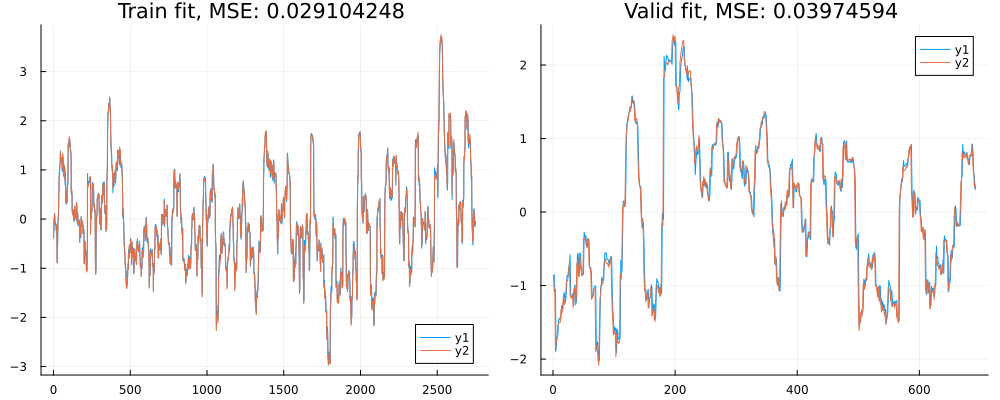

In [364]:
p1 = plot(FFNN(xt_std)', title="Train fit, MSE: $(Flux.Losses.mse(FFNN(xt_std),yt_std)) ",)
p1 = plot!(yt_std')
#
p2 = plot(FFNN(xv_std)', title="Valid fit, MSE: $(Flux.Losses.mse(FFNN(xv_std),yv_std)) ",)
p2 = plot!(yv_std');
plot(p1, p2, size=(1000, 400))

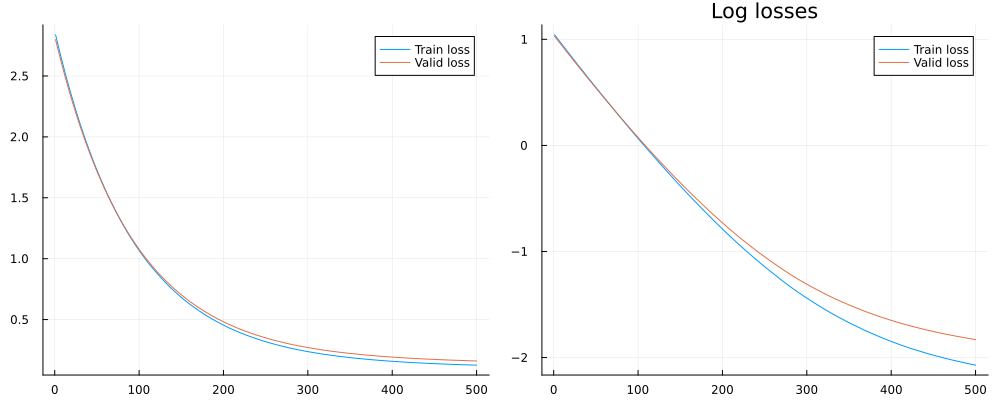

In [307]:
p11 = plot([losses11 losses12], labels=["Train loss" "Valid loss"])
p12 = plot(log.([losses11 losses12]), labels=["Train loss" "Valid loss"], title="Log losses") # might help at some cases
plot(p11, p12, size=(1000,400))

The output provided is from a one-sample Anderson-Darling test, which is used to assess whether a sample comes from a specified distribution. The test strongly rejects the null hypothesis, indicating that the sample does not come from the normal distribution.

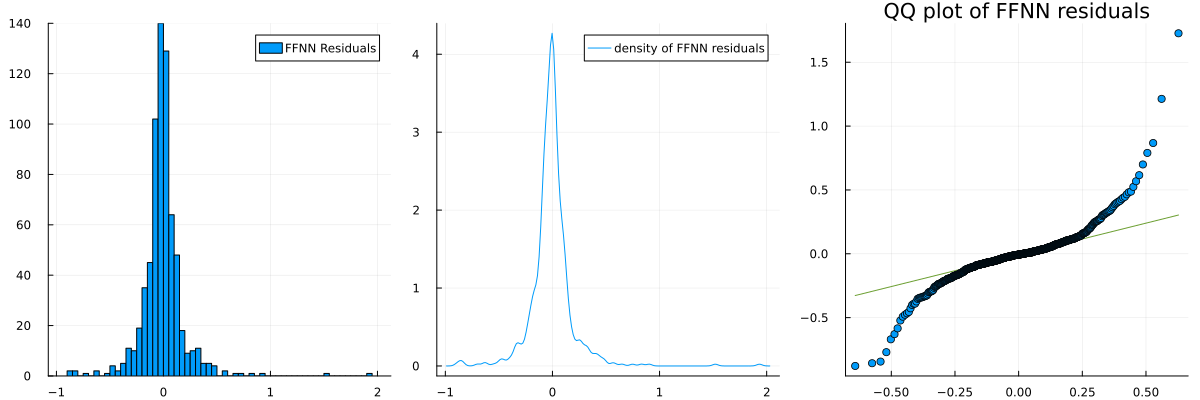

In [376]:
FFNN_resid = yv_std - FFNN(xv_std)
FFNN_quantiles = quantile(Normal(), LinRange(0, 1, length(FFNN_resid)))

qq1 = histogram(FFNN_resid', label = "FFNN Residuals")
qq2 = density(FFNN_resid', label="density of FFNN residuals")
qq3 = qqnorm(vec(FFNN_resid), qqline = :R, title = "QQ plot of FFNN residuals")
plot(qq1, qq2, qq3, layout=(1, 3), size=(1200, 400))

## RNN

In [179]:
xt_rnn = reshape(xt_std, 3, 1, :)
yt_rnn = reshape(yt_std, 1, 1, :)
xv_rnn = reshape(xv_std, 3, 1, :)
yv_rnn = reshape(yv_std, 1, 1, :);

Each "slice" along the third axis represents a sequence of length 3 for x and 1 for y, and the second dimension is used for processing elements within the sequence independently. This reshaping is often used in RNNs where the input is organized as sequences of data, and the network processes each sequence element iteratively. 

In [182]:
size(xt_std), size(yt_std)

((3, 2750), (1, 2750))

In [183]:
size(xt_rnn), size(yt_rnn)

((3, 1, 2750), (1, 1, 2750))

We now see the transformed 3D shape. 

In [370]:
mo1, mb1, lt1, lv1 = trainW4(xt_rnn, yt_rnn, xv_rnn, yv_rnn; nodes=[100, 50, 30], eta=0.01,
n_epochs=500, verbose=30, maxpatience=20, drop=0.1f0, lambdaW=0.0001f0);

Epoch [1/500] 	 Training Loss 0.93 	 Validation Loss 1.17


  ⊚ Counted +1 in patience, 1/20 	 Epoch: 3


  ⊚ Counted +1 in patience, 2/20 	 Epoch: 4


  ⊚ Counted +1 in patience, 3/20 	 Epoch: 5


  ⊚ Counted +1 in patience, 4/20 	 Epoch: 6


  ⊚ Counted +1 in patience, 5/20 	 Epoch: 10


  ⊚ Counted +1 in patience, 6/20 	 Epoch: 11


  ⊚ Counted +1 in patience, 7/20 	 Epoch: 14


  ⊚ Counted +1 in patience, 8/20 	 Epoch: 15


  ⊚ Counted +1 in patience, 9/20 	 Epoch: 18


  ⊚ Counted +1 in patience, 10/20 	 Epoch: 19


  ⊚ Counted +1 in patience, 11/20 	 Epoch: 20


  ⊚ Counted +1 in patience, 12/20 	 Epoch: 21


  ⊚ Counted +1 in patience, 13/20 	 Epoch: 24


  ⊚ Counted +1 in patience, 14/20 	 Epoch: 25


  ⊚ Counted +1 in patience, 15/20 	 Epoch: 26


  ⊚ Counted +1 in patience, 16/20 	 Epoch: 29


  ⊚ Counted +1 in patience, 17/20 	 Epoch: 30


  ⊚ Counted +1 in patience, 18/20 	 Epoch: 31
Epoch [31/500] 	 Training Loss 0.04 	 Validation Loss 0.05


  ⊚ Counted +1 in patience, 19/20 	 Epoch: 35


  ⊚ Counted +1 in patience, 20/20 	 Epoch: 36
 □ Epoch 36 	 Patience is LOST :) 


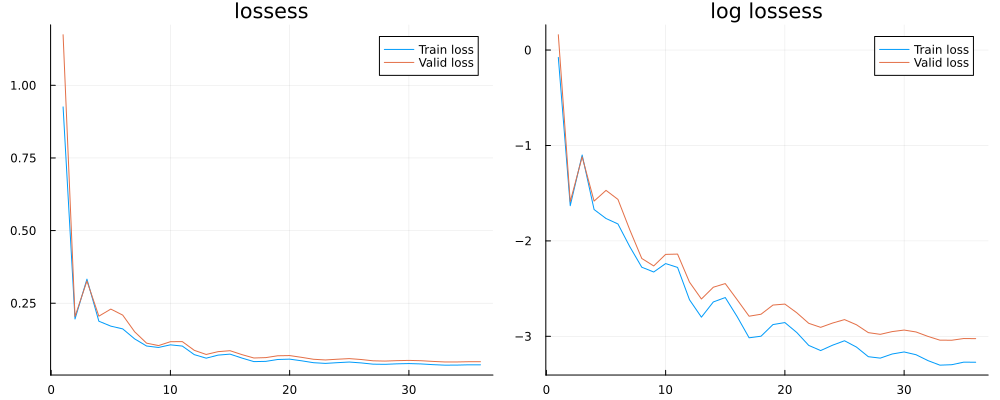

In [371]:
p3l = plot([lt1 lv1], labels=["Train loss" "Valid loss"], title = "lossess")
p4l = plot(log.([lt1 lv1]), labels=["Train loss" "Valid loss"], title = "log lossess")
plot(p3l, p4l, size=(1000,400))

In [372]:
Flux.reset!(mo1) # reset hidden
mo1(xt_rnn) # warm-up model
yhat_mo1_valid = mo1(xv_rnn) |> vec;

In [410]:
RNN_MSE_t = Flux.mse(mo1(xt_rnn), yt_rnn)

0.038024258f0

In [411]:
RNN_MSE_v = Flux.mse(mo1(xv_rnn), yv_rnn)

0.048588853f0

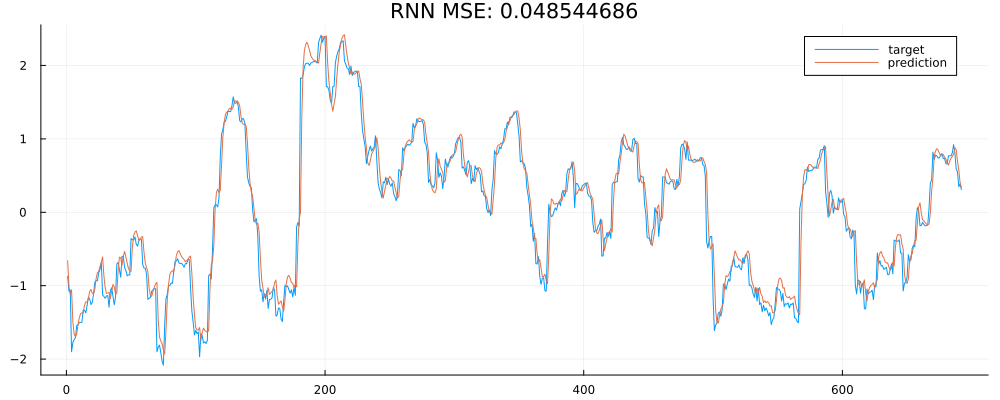

In [379]:
pred_fit = mo1(xv_rnn)
plt_vld = plot(yv_rnn |> vec; label="target")
plt_vld = plot!(pred_fit |> vec; label="prediction", title="RNN MSE: $(Flux.mse(pred_fit, yv_rnn))", size = (1000,400))

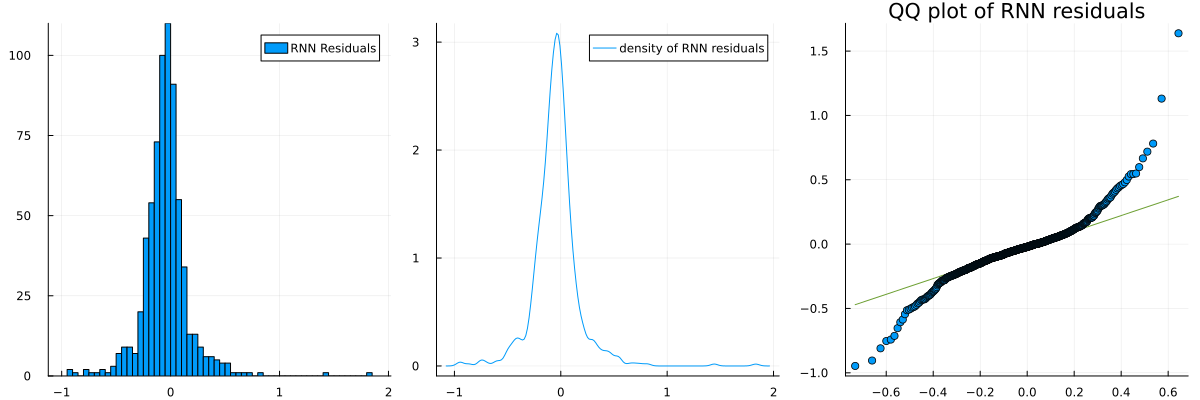

In [384]:
RNN_resid = yv_rnn .- reshape(yhat_mo1_valid, size(yv_rnn))
RNN_resid = dropdims(RNN_resid, dims=(1, 2))

qq1 = histogram(RNN_resid, label = "RNN Residuals")
qq2 = density(RNN_resid, label="density of RNN residuals")
qq3 = qqnorm(RNN_resid, qqline = :R, title = "QQ plot of RNN residuals")

plot(qq1, qq2, qq3, layout=(1, 3), size=(1200, 400))

---

## OLS

In [201]:
beta_har = OLSestimatorconst(yt_std', xt_std')

4×1 Matrix{Float64}:
 -6.527245572144307e-7
  1.0740923091627983
 -0.07121101433316035
 -0.023525718408150823

In [403]:
y_beta = [ones(size(xt_std',1)) xt_std'] * beta_har;

In [405]:
OLS_MSE_t = Flux.mse(y_beta, yt_std')

0.02948991066481734

In [202]:
yhat_beta = [ones(size(xv_std',1)) xv_std'] * beta_har;

In [406]:
OLS_MSE_v = Flux.mse(yhat_beta, yv_std')

0.03932146728849986

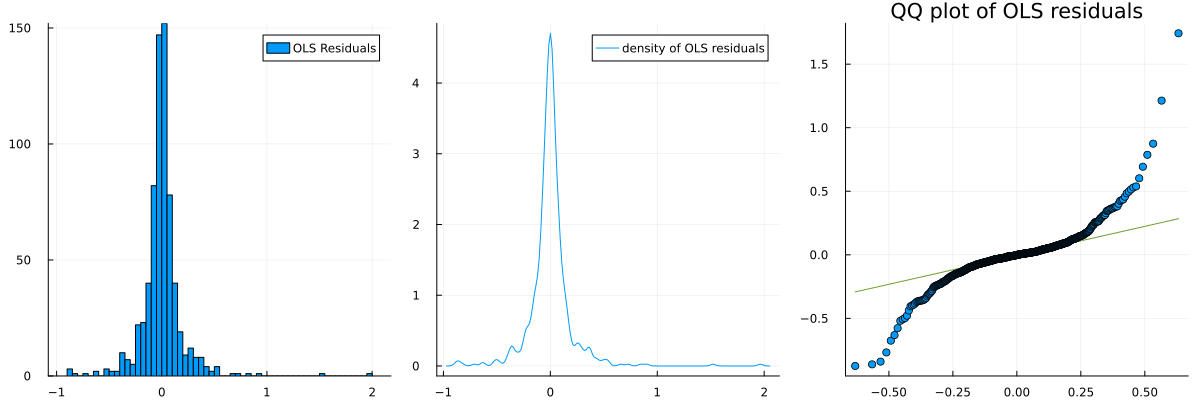

In [387]:
OLS_resid = yv_std' .- yhat_beta

qq1 = histogram(OLS_resid, label = "OLS Residuals")
qq2 = density(OLS_resid, label="density of OLS residuals")
qq3 = qqnorm(vec(OLS_resid), qqline = :R, title = "QQ plot of OLS residuals")

plot(qq1, qq2, qq3, layout=(1, 3), size=(1200, 400))

---

## Comparison

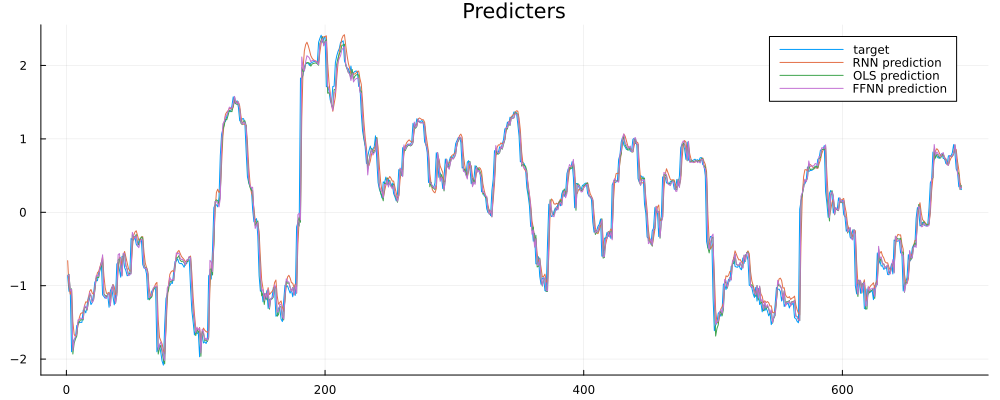

In [377]:
pred_fit = mo1(xv_rnn)
plt_vld = plot(yv_rnn |> vec; label="target")
plt_vld = plot!(pred_fit |> vec; label="RNN prediction", title="Predicters")
plt_vld = plot!(yhat_beta; label="OLS prediction", size = (1000,400))
plt_vld = plot!(FFNN(xv_std)'; label = "FFNN prediction")

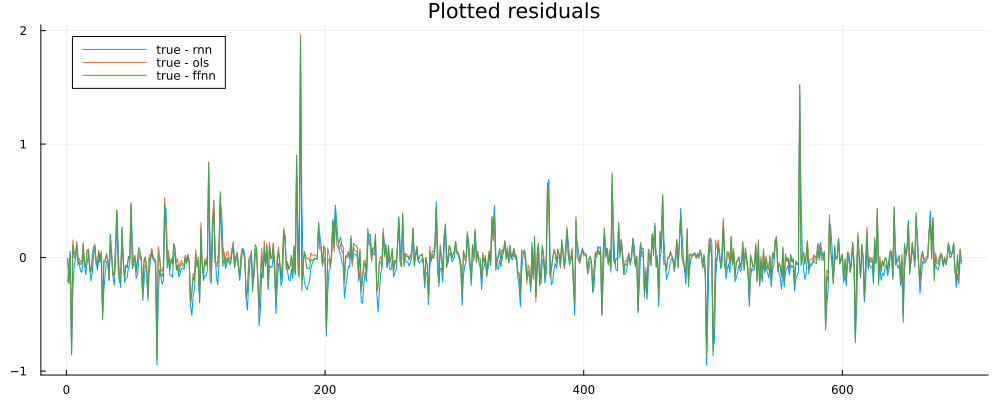

In [399]:
plot(yv_rnn[:] .- pred_fit[:], label="true - rnn")
plot!(yv_rnn[:]  .- yhat_beta, label="true - ols")
plot!(yv_rnn[:] .- FFNN(xv_std)[:], label="true - ffnn", size = (1000, 400), title = "Plotted residuals")


In [401]:
beta_har[1]

-6.527245572144307e-7

In [413]:
analysis = DataFrame(
    Model = ["OLS", "FFNN", "RNN"],
    MSE_t = [OLS_MSE_t, FFNN_MSE_t, RNN_MSE_t],
    MSE_v = [OLS_MSE_v, FFNN_MSE_v, RNN_MSE_v]
)

# Display the DataFrame
display(analysis)

3×3 DataFrame
 Row │ Model   MSE_t      MSE_v     
     │ String  Float64    Float64   
─────┼──────────────────────────────
   1 │ OLS     0.0294899  0.0393215
   2 │ FFNN    0.0291042  0.0397459
   3 │ RNN     0.0380243  0.0485889

---

# Part C

### Ensemble loop

In [414]:
n_ensembles = 5
arr_models = []
ens_loss_t = []
ens_loss_v = []
for iens in 1:n_ensembles
    println("> Running ensemble $iens")
    @time mo0, mb0, lt0, lv0 = trainW4(xt_rnn, yt_rnn, xv_rnn, yv_rnn; nodes=[100, 50, 30], eta=0.01,
    n_epochs=500, verbose=30, maxpatience=20, drop=0.1f0, lambdaW=0.0001f0)
    # _ saving
    push!(arr_models, mb0) # saving the best model for each ensemble
    push!(ens_loss_t, lt0)
    push!(ens_loss_v, lv0)
end

> Running ensemble 1


Epoch [1/500] 	 Training Loss 3.85 	 Validation Loss 4.26


  ⊚ Counted +1 in patience, 1/20 	 Epoch: 3


  ⊚ Counted +1 in patience, 2/20 	 Epoch: 4


  ⊚ Counted +1 in patience, 3/20 	 Epoch: 5


  ⊚ Counted +1 in patience, 4/20 	 Epoch: 6


  ⊚ Counted +1 in patience, 5/20 	 Epoch: 7


  ⊚ Counted +1 in patience, 6/20 	 Epoch: 10


  ⊚ Counted +1 in patience, 7/20 	 Epoch: 14


  ⊚ Counted +1 in patience, 8/20 	 Epoch: 15


  ⊚ Counted +1 in patience, 9/20 	 Epoch: 16


  ⊚ Counted +1 in patience, 10/20 	 Epoch: 19


  ⊚ Counted +1 in patience, 11/20 	 Epoch: 20


  ⊚ Counted +1 in patience, 12/20 	 Epoch: 21


  ⊚ Counted +1 in patience, 13/20 	 Epoch: 24


  ⊚ Counted +1 in patience, 14/20 	 Epoch: 25


  ⊚ Counted +1 in patience, 15/20 	 Epoch: 26


  ⊚ Counted +1 in patience, 16/20 	 Epoch: 27


  ⊚ Counted +1 in patience, 17/20 	 Epoch: 30


  ⊚ Counted +1 in patience, 18/20 	 Epoch: 31
Epoch [31/500] 	 Training Loss 0.05 	 Validation Loss 0.07


  ⊚ Counted +1 in patience, 19/20 	 Epoch: 32


  ⊚ Counted +1 in patience, 20/20 	 Epoch: 35
 □ Epoch 35 	 Patience is LOST :) 
 13.482286 seconds (13.20 M allocations: 34.226 GiB, 37.70% gc time)
> Running ensemble 2


Epoch [1/500] 	 Training Loss 2.41 	 Validation Loss 2.93


  ⊚ Counted +1 in patience, 1/20 	 Epoch: 3


  ⊚ Counted +1 in patience, 2/20 	 Epoch: 4


  ⊚ Counted +1 in patience, 3/20 	 Epoch: 6


  ⊚ Counted +1 in patience, 4/20 	 Epoch: 7


  ⊚ Counted +1 in patience, 5/20 	 Epoch: 10


  ⊚ Counted +1 in patience, 6/20 	 Epoch: 11


  ⊚ Counted +1 in patience, 7/20 	 Epoch: 14


  ⊚ Counted +1 in patience, 8/20 	 Epoch: 15


  ⊚ Counted +1 in patience, 9/20 	 Epoch: 16


  ⊚ Counted +1 in patience, 10/20 	 Epoch: 19


  ⊚ Counted +1 in patience, 11/20 	 Epoch: 20


  ⊚ Counted +1 in patience, 12/20 	 Epoch: 21


  ⊚ Counted +1 in patience, 13/20 	 Epoch: 24


  ⊚ Counted +1 in patience, 14/20 	 Epoch: 25


  ⊚ Counted +1 in patience, 15/20 	 Epoch: 26


  ⊚ Counted +1 in patience, 16/20 	 Epoch: 29


  ⊚ Counted +1 in patience, 17/20 	 Epoch: 30


  ⊚ Counted +1 in patience, 18/20 	 Epoch: 31
Epoch [31/500] 	 Training Loss 0.05 	 Validation Loss 0.06


  ⊚ Counted +1 in patience, 19/20 	 Epoch: 34


  ⊚ Counted +1 in patience, 20/20 	 Epoch: 35
 □ Epoch 35 	 Patience is LOST :) 
 13.938953 seconds (13.20 M allocations: 34.226 GiB, 38.18% gc time)
> Running ensemble 3


Epoch [1/500] 	 Training Loss 0.57 	 Validation Loss 0.74


  ⊚ Counted +1 in patience, 1/20 	 Epoch: 5


  ⊚ Counted +1 in patience, 2/20 	 Epoch: 8


  ⊚ Counted +1 in patience, 3/20 	 Epoch: 11


  ⊚ Counted +1 in patience, 4/20 	 Epoch: 12


  ⊚ Counted +1 in patience, 5/20 	 Epoch: 15


  ⊚ Counted +1 in patience, 6/20 	 Epoch: 16


  ⊚ Counted +1 in patience, 7/20 	 Epoch: 19


  ⊚ Counted +1 in patience, 8/20 	 Epoch: 20


  ⊚ Counted +1 in patience, 9/20 	 Epoch: 24


  ⊚ Counted +1 in patience, 10/20 	 Epoch: 25


  ⊚ Counted +1 in patience, 11/20 	 Epoch: 28


  ⊚ Counted +1 in patience, 12/20 	 Epoch: 29


  ⊚ Counted +1 in patience, 13/20 	 Epoch: 30


Epoch [31/500] 	 Training Loss 0.04 	 Validation Loss 0.05


  ⊚ Counted +1 in patience, 14/20 	 Epoch: 33


  ⊚ Counted +1 in patience, 15/20 	 Epoch: 34


  ⊚ Counted +1 in patience, 16/20 	 Epoch: 37


  ⊚ Counted +1 in patience, 17/20 	 Epoch: 38


  ⊚ Counted +1 in patience, 18/20 	 Epoch: 39


  ⊚ Counted +1 in patience, 19/20 	 Epoch: 46


  ⊚ Counted +1 in patience, 20/20 	 Epoch: 47
 □ Epoch 47 	 Patience is LOST :) 
 18.737465 seconds (17.73 M allocations: 45.961 GiB, 38.81% gc time)
> Running ensemble 4


Epoch [1/500] 	 Training Loss 3.21 	 Validation Loss 3.57


  ⊚ Counted +1 in patience, 1/20 	 Epoch: 3


  ⊚ Counted +1 in patience, 2/20 	 Epoch: 4


  ⊚ Counted +1 in patience, 3/20 	 Epoch: 6


  ⊚ Counted +1 in patience, 4/20 	 Epoch: 7


  ⊚ Counted +1 in patience, 5/20 	 Epoch: 10


  ⊚ Counted +1 in patience, 6/20 	 Epoch: 14


  ⊚ Counted +1 in patience, 7/20 	 Epoch: 15


  ⊚ Counted +1 in patience, 8/20 	 Epoch: 16


  ⊚ Counted +1 in patience, 9/20 	 Epoch: 19


  ⊚ Counted +1 in patience, 10/20 	 Epoch: 20


  ⊚ Counted +1 in patience, 11/20 	 Epoch: 21


  ⊚ Counted +1 in patience, 12/20 	 Epoch: 24


  ⊚ Counted +1 in patience, 13/20 	 Epoch: 25


  ⊚ Counted +1 in patience, 14/20 	 Epoch: 26


  ⊚ Counted +1 in patience, 15/20 	 Epoch: 27


  ⊚ Counted +1 in patience, 16/20 	 Epoch: 29


  ⊚ Counted +1 in patience, 17/20 	 Epoch: 30


  ⊚ Counted +1 in patience, 18/20 	 Epoch: 31
Epoch [31/500] 	 Training Loss 0.05 	 Validation Loss 0.06


  ⊚ Counted +1 in patience, 19/20 	 Epoch: 32


  ⊚ Counted +1 in patience, 20/20 	 Epoch: 35
 □ Epoch 35 	 Patience is LOST :) 
 13.855724 seconds (13.20 M allocations: 34.226 GiB, 39.27% gc time)
> Running ensemble 5


Epoch [1/500] 	 Training Loss 3.82 	 Validation Loss 4.37


  ⊚ Counted +1 in patience, 1/20 	 Epoch: 3


  ⊚ Counted +1 in patience, 2/20 	 Epoch: 4


  ⊚ Counted +1 in patience, 3/20 	 Epoch: 5


  ⊚ Counted +1 in patience, 4/20 	 Epoch: 6


  ⊚ Counted +1 in patience, 5/20 	 Epoch: 7


  ⊚ Counted +1 in patience, 6/20 	 Epoch: 16


  ⊚ Counted +1 in patience, 7/20 	 Epoch: 17


  ⊚ Counted +1 in patience, 8/20 	 Epoch: 21


  ⊚ Counted +1 in patience, 9/20 	 Epoch: 22


  ⊚ Counted +1 in patience, 10/20 	 Epoch: 23


  ⊚ Counted +1 in patience, 11/20 	 Epoch: 26


  ⊚ Counted +1 in patience, 12/20 	 Epoch: 27


  ⊚ Counted +1 in patience, 13/20 	 Epoch: 28


  ⊚ Counted +1 in patience, 14/20 	 Epoch: 29


Epoch [31/500] 	 Training Loss 0.05 	 Validation Loss 0.06


  ⊚ Counted +1 in patience, 15/20 	 Epoch: 32


  ⊚ Counted +1 in patience, 16/20 	 Epoch: 33


  ⊚ Counted +1 in patience, 17/20 	 Epoch: 34


  ⊚ Counted +1 in patience, 18/20 	 Epoch: 38


  ⊚ Counted +1 in patience, 19/20 	 Epoch: 39


  ⊚ Counted +1 in patience, 20/20 	 Epoch: 40
 □ Epoch 40 	 Patience is LOST :) 
 15.218578 seconds (15.09 M allocations: 39.116 GiB, 39.20% gc time)


In [415]:
arr_models

5-element Vector{Any}:
 Chain(Recur(LSTMCell(3 => 100)), Dropout(0.1), Dense(100 => 50), Dropout(0.1), Dense(50 => 1))  # 46_901 parameters, plus 200 non-trainable
 Chain(Recur(LSTMCell(3 => 100)), Dropout(0.1), Dense(100 => 50), Dropout(0.1), Dense(50 => 1))  # 46_901 parameters, plus 200 non-trainable
 Chain(Recur(LSTMCell(3 => 100)), Dropout(0.1), Dense(100 => 50), Dropout(0.1), Dense(50 => 1))  # 46_901 parameters, plus 200 non-trainable
 Chain(Recur(LSTMCell(3 => 100)), Dropout(0.1), Dense(100 => 50), Dropout(0.1), Dense(50 => 1))  # 46_901 parameters, plus 200 non-trainable
 Chain(Recur(LSTMCell(3 => 100)), Dropout(0.1), Dense(100 => 50), Dropout(0.1), Dense(50 => 1))  # 46_901 parameters, plus 200 non-trainable

Plotting coefficients of the first model

In [416]:
m_pars = Flux.params(arr_models[1]) |> collect .|> vec

9-element Vector{Vector{Float32}}:
 [-0.076730244, 0.028964086, -0.0019851588, -0.104838185, 0.052085027, 0.029836345, -0.0895708, -0.11627582, -0.1253714, -0.0058277007  …  -0.07466066, -0.12564398, -0.05040652, -0.00045332348, 0.14842914, -0.07703405, -0.15219602, -0.006044939, 0.066010416, 0.022553438]
 [-0.08794726, -0.04746803, -0.059432484, 0.0013393802, 0.06358393, 0.010459467, -0.09154006, -0.13443027, -0.061719738, 0.040291075  …  -0.091254465, 0.14653113, 0.027685553, -0.012727395, 0.10734689, 0.08699394, 0.019958844, 0.14011331, -0.094150305, -0.020720996]
 [-0.035143, -0.13794115, -0.042660724, -0.11214749, -0.05998167, -0.036058582, -0.081259504, -0.030674456, -0.042319193, -0.03659939  …  -0.09573896, -0.04935841, -0.050219547, 0.01669281, 0.01716498, -0.03293849, -0.04246634, 0.023391599, -0.021400187, -0.13585012]
 [0.027985713, 0.021158874, -0.102383465, 0.02555774, 0.08956982, -0.07076509, -0.04463956, -0.02285044, 0.03844914, -0.08191528  …  0.066765524, -0.017250206

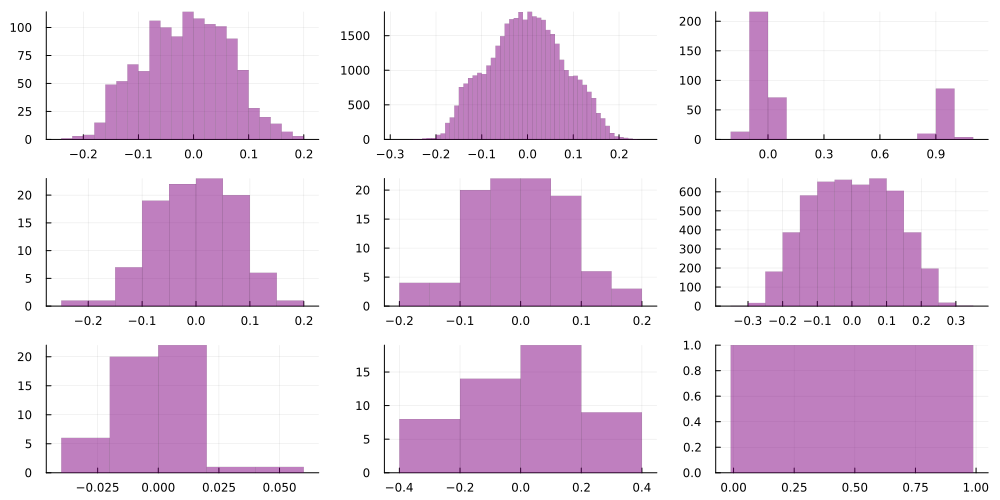

In [418]:
plot(histogram.(m_pars)..., line=(0), fill=(1, 0.5, :purple), legend=:none, size = (1000, 500))

Plot losses of all models in ensemble
Fit all models to see the output (still on validation which we use in training for stopping, for instance, thus not true Out-of-sample):

In [419]:
yhat_array = []
for m in arr_models
    Flux.reset!(m) # reset model
    m(xt_rnn) # warm-up the model for time step prior prediction
    push!(yhat_array, m(xv_rnn))
end

In [420]:
yhat_ensemble = mean(yhat_array) |> vec;

In [421]:
size(xtrain), size(ytrain)

((3, 2750), (1, 2750))

HAR prediction

In [422]:
har_coefs = OLSestimatorconst(yt_std', xt_std')
yhat_har_valid = (xv_std' * har_coefs[2:end]) .+ har_coefs[1];

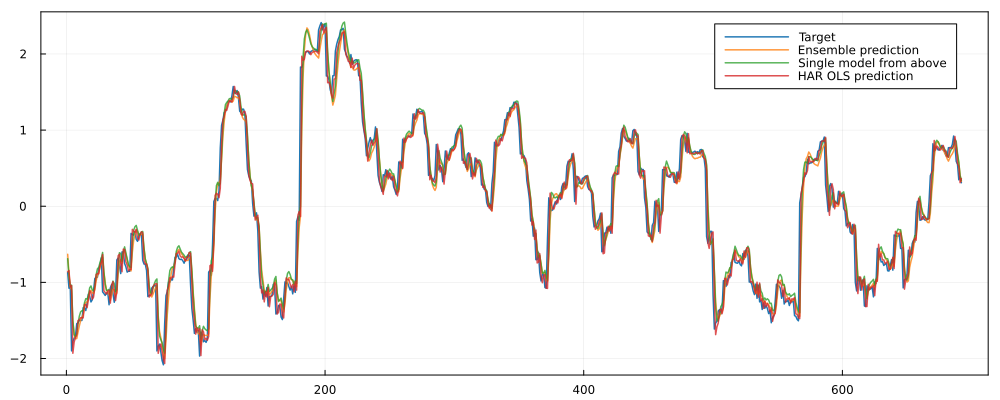

In [423]:
plot(yv_rnn |> vec, label="Target", size=(1000,400), framestyle=:box, line=(1.5, 1.0, :solid), palette=:tab10)
plot!(yhat_ensemble, label="Ensemble prediction", line=(1.5, 0.8, :solid))
plot!(yhat_mo1_valid, label="Single model from above", line=(1.5, 0.8, :solid))
plot!(yhat_har_valid, label="HAR OLS prediction", line=(1.5, 0.8, :solid))

In [424]:
println(" HAR: ", Flux.mse(yhat_har_valid, yv_rnn |> vec), "\n",
    " Ens: ", Flux.mse(yhat_ensemble, yv_rnn |> vec), "\n",
    " M1:  ", Flux.mse(yhat_mo1_valid, yv_rnn |> vec), "\n")

 HAR: 0.03932146728849986
 Ens: 0.05281107
 M1:  0.048588853



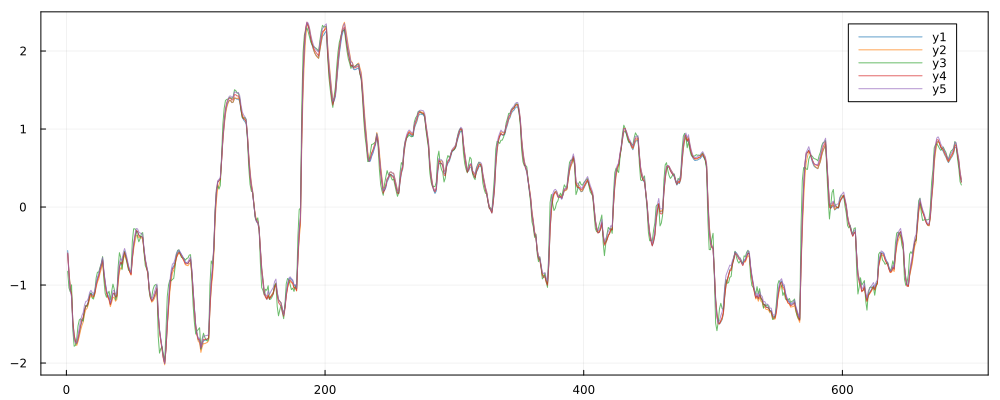

In [426]:
# plot individual predictions
plot(yhat_array .|> vec, framestyle=:box, line=(1, 0.7, :solid), palette=:tab10, size=(1000,400))

In [ ]:
Pkg.activate()